# Build a CNN with a VGG block

Import prerequesists

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from keras_preprocessing.image import ImageDataGenerator
import os, sys

Specify train and test image set paths

In [ ]:
train_set_path = '/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/test'
test_set_path = '/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/test'

Function to create a CNN with single VGG blacok

In [ ]:
# define cnn model 
# Input shape = (200, 200)
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1, activation='sigmoid'))
  # compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model

Function to evaluate Cross Entropy Loss and Classification Accuracy

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    #filename = sys.argv[0].split('/')[-1]
    #plt.savefig(filename + '_plot.png')
    plt.show()
    plt.close()

Image Data Generator with rescaling images

In [ ]:
# Data generator, same generator for train set and test set
data_gen = ImageDataGenerator(rescale=1.0/255.0)

train_gen = data_gen.flow_from_directory(train_set_path,
                                        class_mode='binary',
                                        batch_size=64,
                                        target_size=(200, 200))

test_gen = data_gen.flow_from_directory(test_set_path,
                                        class_mode='binary',
                                        batch_size=64,
                                        target_size=(200, 200))

Found 6301 images belonging to 2 classes.
Found 6301 images belonging to 2 classes.


Train Model and evaluate

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
99/99 [==============================] - 857s 9s/step - loss: 0.7308 - accuracy: 0.5482 - val_loss: 0.6823 - val_accuracy: 0.5391
Epoch 2/20
99/99 [==============================] - 516s 5s/step - loss: 0.6784 - accuracy: 0.5690 - val_loss: 0.6825 - val_accuracy: 0.5444
Epoch 3/20
99/99 [==============================] - 515s 5s/step - loss: 0.6698 - accuracy: 0.5809 - val_loss: 0.6651 - val_accuracy: 0.5805
Epoch 4/20
99/99 [==============================] - 516s 5s/step - loss: 0.6495 - accuracy: 0.6115 - val_loss: 0.6330 - val_accuracy: 0.6362
Epoch 5/20
99/99 [==============================] - 534s 5s/step - loss: 0.6367 - accuracy: 0.6231 - val_loss: 0.6205 - val_accuracy: 0.6486
Epoch 6/20
99/99 [==============================] - 510s 5s/step - loss: 0.6252 - accuracy: 0.6377 - val_loss: 0.6273 - val_accuracy: 0.6299
Epoch 7/20
99/99 [==============================] - 508s 5s/step - loss: 0.6139 - accuracy: 0.6493 - val_loss: 0.5954 - val_accuracy: 0.6789
Epoch 8/20
99

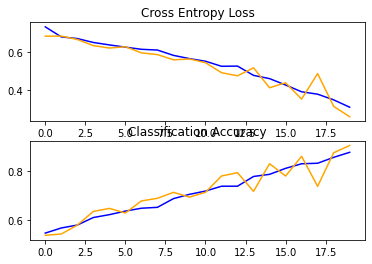

In [ ]:
# Train a model
model = define_model()

history = model.fit(train_gen, 
                    steps_per_epoch=len(train_gen),
                    validation_data=test_gen, 
                    validation_steps=len(test_gen), 
                    epochs=20, 
                    verbose=1)

summarize_diagnostics(history)